   0       1        2        3        4        5        6        7        8   \
0   0 -354.05  -103.53  -376.58   118.82 -1084.15  -974.98  -667.60 -1158.71   
1   0 -269.83   -21.46  -391.60   101.39 -1792.79 -1355.05  -832.02 -1861.99   
2   0 -680.21  1859.58 -1336.81  5153.06  -443.91 -1362.83  -977.67  -418.69   
3   0 -661.16  1951.04 -1322.06  5335.72  -417.62 -1359.08  -986.52  -393.48   
4   0 -236.03  -116.41  -327.77  -270.10 -2679.26 -1892.03 -1109.09 -2827.58   

   9   ...  17  18  19  20  21  22  23  24  25  26  
0   0  ...   0   0   0   0   0   0   0   0   0   0  
1   0  ...   0   0   0   0   0   0   0   0   0   0  
2   0  ...   0   0   0   0   0   0   0   0   0   0  
3   0  ...   0   0   0   0   0   0   0   0   0   0  
4   0  ...   0   0   0   0   0   0   0   0   0   0  

[5 rows x 27 columns]


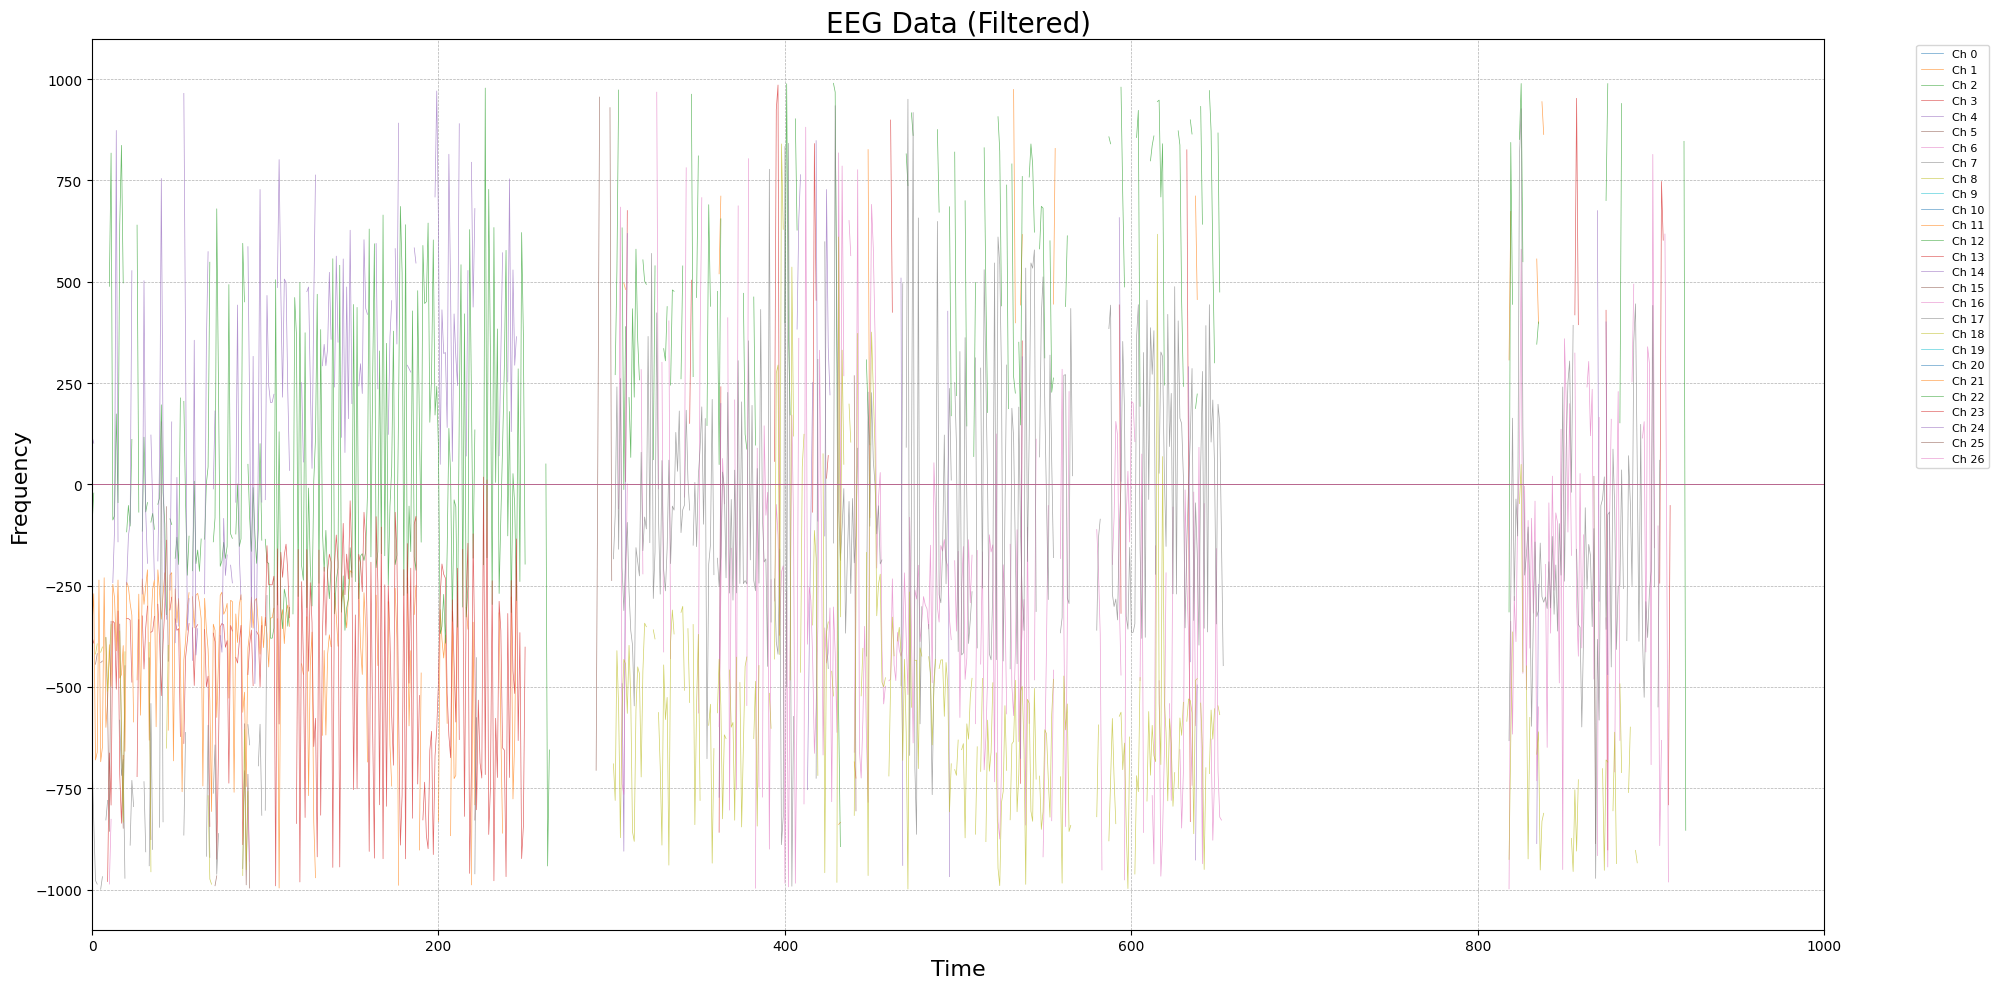

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('eegBigData.csv', header=None)
print(df.head())

df.index = range(len(df))

MAX_VALUE = 1000
df = df.where(df.abs() <= MAX_VALUE)

# Plot
plt.figure(figsize=(20, 10))

for col in df.columns:
    plt.plot(df.index, df[col], label=f'Ch {col}', linewidth=0.5, alpha=0.7)  # thinner lines, a bit transparent

plt.xlabel('Time', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('EEG Data (Filtered)', fontsize=20)
plt.grid(True, linestyle='--', linewidth=0.5)

# Legend OUTSIDE the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# 🔥 Optional: Zoom into first 1000 samples
plt.xlim(0, 1000)

plt.tight_layout()
plt.show()


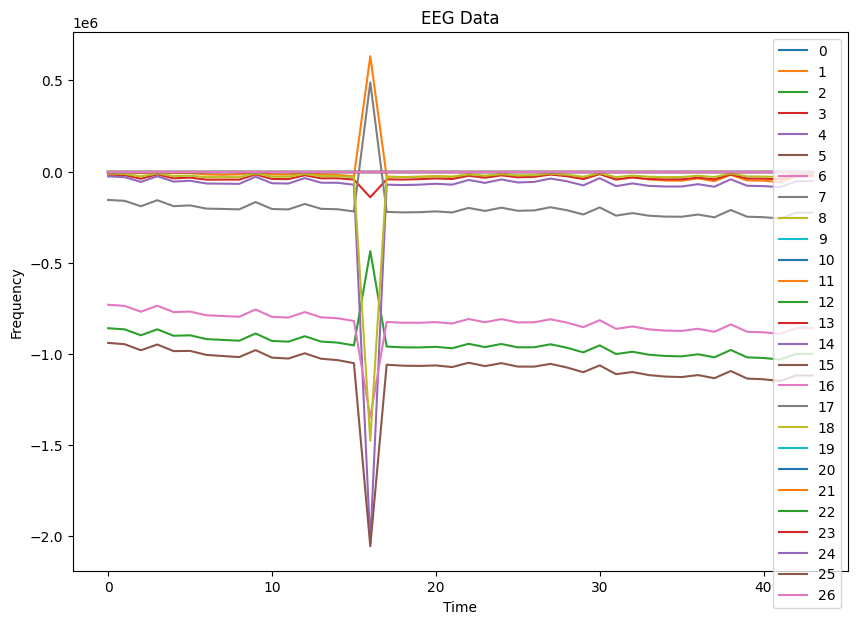

In [24]:
df1.plot(kind='line', figsize=(10, 7))
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('EEG Data')
plt.show()